In [79]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [80]:
# Here We Convert Minutely Data to Daily Form 

def dateparse (time_in_secs):    
    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

In [81]:
df = pd.read_csv("eur_dollar.csv") 

In [82]:
df

,date,value
0,1999-01-04,1.1825
1,1999-01-05,1.1774
2,1999-01-06,1.1622
3,1999-01-07,1.1706
4,1999-01-08,1.1577
...,...,...
5909,2021-06-14,1.2121
5910,2021-06-15,1.2128
5911,2021-06-16,1.1996
5912,2021-06-17,1.1912


In [83]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [18]:
df.drop("date2", axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 2 columns):
date      5914 non-null object
 value    5914 non-null float64
dtypes: float64(1), object(1)
memory usage: 92.5+ KB


In [84]:
df.set_index("date", inplace=True)

In [87]:
df.columns = ["Close"]

In [73]:
from stockstats import StockDataFrame

In [89]:
df = StockDataFrame.retype(df)
df['macd'] = df.get('macd') # calculate MACD

In [90]:
df

,close,macd,macds,macdh
date,,,,
1999-01-04,1.1825,0.000000,0.000000,0.000000
1999-01-05,1.1774,-0.000114,-0.000064,-0.000051
1999-01-06,1.1622,-0.000617,-0.000290,-0.000327
1999-01-07,1.1706,-0.000527,-0.000371,-0.000157
1999-01-08,1.1577,-0.000981,-0.000552,-0.000429
...,...,...,...,...
2021-06-14,1.2121,-0.000037,0.001388,-0.001425
2021-06-15,1.2128,-0.000241,0.001062,-0.001304
2021-06-16,1.1996,-0.001452,0.000560,-0.002011


In [91]:
buying = []
selling = []

i = 0

for x in range(len(df)-2):
    
        nextDayDate  = df.index[1 + i]
        nextDayMacd = df.iloc[1 + i]
        nextDayMacds = df.iloc[1 + i]
        print(nextDayDate)    
        
        if(df["macd"].iloc[i+1] < df["macds"].iloc[i+1]):
            if(df["macd"].iloc[i+2] > df["macds"].iloc[i+2]):
                print("burada alım yapılması lazım")
                buying.append([df.index[i+1],  df["close"].iloc[i+2]])
                
        if(df["macd"].iloc[i+1] > df["macds"].iloc[i+1]):
            if(df["macd"].iloc[i+2] < df["macds"].iloc[i+2]):
                print("burada satım yapılması lazım")
                selling.append([df.index[i+1],  df["close"].iloc[i+2]])
                
                
        
        i = i+1 

1999-01-05 00:00:00
1999-01-06 00:00:00
1999-01-07 00:00:00
1999-01-08 00:00:00
1999-01-11 00:00:00
1999-01-12 00:00:00
1999-01-13 00:00:00
burada alım yapılması lazım
1999-01-14 00:00:00
burada satım yapılması lazım
1999-01-15 00:00:00
1999-01-19 00:00:00
1999-01-20 00:00:00
1999-01-21 00:00:00
1999-01-22 00:00:00
1999-01-25 00:00:00
1999-01-26 00:00:00
1999-01-27 00:00:00
1999-01-28 00:00:00
1999-01-29 00:00:00
1999-02-01 00:00:00
1999-02-02 00:00:00
1999-02-03 00:00:00
1999-02-04 00:00:00
1999-02-05 00:00:00
1999-02-08 00:00:00
1999-02-09 00:00:00
1999-02-10 00:00:00
1999-02-11 00:00:00
1999-02-12 00:00:00
1999-02-16 00:00:00
1999-02-17 00:00:00
1999-02-18 00:00:00
1999-02-19 00:00:00
1999-02-22 00:00:00
1999-02-23 00:00:00
1999-02-24 00:00:00
1999-02-25 00:00:00
1999-02-26 00:00:00
1999-03-01 00:00:00
1999-03-02 00:00:00
1999-03-03 00:00:00
1999-03-04 00:00:00
1999-03-05 00:00:00
1999-03-08 00:00:00
1999-03-09 00:00:00
burada alım yapılması lazım
1999-03-10 00:00:00
1999-03-11 00:0

2000-12-19 00:00:00
2000-12-20 00:00:00
2000-12-21 00:00:00
2000-12-22 00:00:00
2000-12-26 00:00:00
2000-12-27 00:00:00
2000-12-28 00:00:00
2000-12-29 00:00:00
2001-01-02 00:00:00
2001-01-03 00:00:00
2001-01-04 00:00:00
2001-01-05 00:00:00
2001-01-08 00:00:00
2001-01-09 00:00:00
burada satım yapılması lazım
2001-01-10 00:00:00
2001-01-11 00:00:00
2001-01-12 00:00:00
2001-01-16 00:00:00
2001-01-17 00:00:00
2001-01-18 00:00:00
2001-01-19 00:00:00
2001-01-22 00:00:00
2001-01-23 00:00:00
2001-01-24 00:00:00
2001-01-25 00:00:00
2001-01-26 00:00:00
2001-01-29 00:00:00
2001-01-30 00:00:00
2001-01-31 00:00:00
2001-02-01 00:00:00
2001-02-02 00:00:00
2001-02-05 00:00:00
2001-02-06 00:00:00
2001-02-07 00:00:00
2001-02-08 00:00:00
2001-02-09 00:00:00
2001-02-12 00:00:00
2001-02-13 00:00:00
2001-02-14 00:00:00
2001-02-15 00:00:00
2001-02-16 00:00:00
2001-02-20 00:00:00
2001-02-21 00:00:00
2001-02-22 00:00:00
2001-02-23 00:00:00
2001-02-26 00:00:00
2001-02-27 00:00:00
2001-02-28 00:00:00
burada alım

2002-08-30 00:00:00
2002-09-03 00:00:00
2002-09-04 00:00:00
2002-09-05 00:00:00
2002-09-06 00:00:00
2002-09-09 00:00:00
burada satım yapılması lazım
2002-09-10 00:00:00
2002-09-11 00:00:00
2002-09-12 00:00:00
2002-09-13 00:00:00
2002-09-16 00:00:00
2002-09-17 00:00:00
2002-09-18 00:00:00
2002-09-19 00:00:00
burada alım yapılması lazım
2002-09-20 00:00:00
2002-09-23 00:00:00
2002-09-24 00:00:00
burada satım yapılması lazım
2002-09-25 00:00:00
2002-09-26 00:00:00
burada alım yapılması lazım
2002-09-27 00:00:00
2002-09-30 00:00:00
2002-10-01 00:00:00
2002-10-02 00:00:00
2002-10-03 00:00:00
2002-10-04 00:00:00
2002-10-07 00:00:00
2002-10-08 00:00:00
2002-10-09 00:00:00
2002-10-10 00:00:00
2002-10-11 00:00:00
2002-10-14 00:00:00
2002-10-15 00:00:00
burada satım yapılması lazım
2002-10-16 00:00:00
2002-10-17 00:00:00
2002-10-18 00:00:00
2002-10-21 00:00:00
2002-10-22 00:00:00
2002-10-23 00:00:00
2002-10-24 00:00:00
2002-10-25 00:00:00
2002-10-28 00:00:00
burada alım yapılması lazım
2002-10-2

2004-06-21 00:00:00
2004-06-22 00:00:00
2004-06-23 00:00:00
2004-06-24 00:00:00
2004-06-25 00:00:00
burada alım yapılması lazım
2004-06-28 00:00:00
burada satım yapılması lazım
2004-06-29 00:00:00
2004-06-30 00:00:00
2004-07-01 00:00:00
burada alım yapılması lazım
2004-07-02 00:00:00
2004-07-06 00:00:00
2004-07-07 00:00:00
2004-07-08 00:00:00
2004-07-09 00:00:00
2004-07-12 00:00:00
2004-07-13 00:00:00
2004-07-14 00:00:00
2004-07-15 00:00:00
2004-07-16 00:00:00
2004-07-19 00:00:00
2004-07-20 00:00:00
burada satım yapılması lazım
2004-07-21 00:00:00
2004-07-22 00:00:00
2004-07-23 00:00:00
2004-07-26 00:00:00
2004-07-27 00:00:00
2004-07-28 00:00:00
2004-07-29 00:00:00
2004-07-30 00:00:00
2004-08-02 00:00:00
2004-08-03 00:00:00
2004-08-04 00:00:00
2004-08-05 00:00:00
2004-08-06 00:00:00
burada alım yapılması lazım
2004-08-09 00:00:00
2004-08-10 00:00:00
2004-08-11 00:00:00
2004-08-12 00:00:00
2004-08-13 00:00:00
2004-08-16 00:00:00
2004-08-17 00:00:00
2004-08-18 00:00:00
2004-08-19 00:00:0

2007-03-20 00:00:00
2007-03-21 00:00:00
2007-03-22 00:00:00
2007-03-23 00:00:00
2007-03-26 00:00:00
2007-03-27 00:00:00
2007-03-28 00:00:00
2007-03-29 00:00:00
2007-03-30 00:00:00
2007-04-02 00:00:00
burada satım yapılması lazım
2007-04-03 00:00:00
2007-04-04 00:00:00
burada alım yapılması lazım
2007-04-05 00:00:00
burada satım yapılması lazım
2007-04-09 00:00:00
burada alım yapılması lazım
2007-04-10 00:00:00
2007-04-11 00:00:00
2007-04-12 00:00:00
2007-04-13 00:00:00
2007-04-16 00:00:00
2007-04-17 00:00:00
2007-04-18 00:00:00
2007-04-19 00:00:00
2007-04-20 00:00:00
2007-04-23 00:00:00
2007-04-24 00:00:00
2007-04-25 00:00:00
2007-04-26 00:00:00
2007-04-27 00:00:00
2007-04-30 00:00:00
burada satım yapılması lazım
2007-05-01 00:00:00
2007-05-02 00:00:00
2007-05-03 00:00:00
2007-05-04 00:00:00
2007-05-07 00:00:00
2007-05-08 00:00:00
2007-05-09 00:00:00
2007-05-10 00:00:00
2007-05-11 00:00:00
2007-05-14 00:00:00
2007-05-15 00:00:00
2007-05-16 00:00:00
2007-05-17 00:00:00
2007-05-18 00:00:

2009-10-22 00:00:00
2009-10-23 00:00:00
2009-10-26 00:00:00
burada satım yapılması lazım
2009-10-27 00:00:00
2009-10-28 00:00:00
2009-10-29 00:00:00
2009-10-30 00:00:00
2009-11-02 00:00:00
2009-11-03 00:00:00
2009-11-04 00:00:00
2009-11-05 00:00:00
2009-11-06 00:00:00
2009-11-09 00:00:00
burada alım yapılması lazım
2009-11-10 00:00:00
2009-11-11 00:00:00
burada satım yapılması lazım
2009-11-12 00:00:00
2009-11-13 00:00:00
burada alım yapılması lazım
2009-11-16 00:00:00
burada satım yapılması lazım
2009-11-17 00:00:00
2009-11-18 00:00:00
2009-11-19 00:00:00
2009-11-20 00:00:00
2009-11-23 00:00:00
2009-11-24 00:00:00
burada alım yapılması lazım
2009-11-25 00:00:00
2009-11-27 00:00:00
2009-11-30 00:00:00
2009-12-01 00:00:00
2009-12-02 00:00:00
2009-12-03 00:00:00
burada satım yapılması lazım
2009-12-04 00:00:00
2009-12-07 00:00:00
2009-12-08 00:00:00
2009-12-09 00:00:00
2009-12-10 00:00:00
2009-12-11 00:00:00
2009-12-14 00:00:00
2009-12-15 00:00:00
2009-12-16 00:00:00
2009-12-17 00:00:00


2011-04-21 00:00:00
burada alım yapılması lazım
2011-04-25 00:00:00
2011-04-26 00:00:00
2011-04-27 00:00:00
2011-04-28 00:00:00
2011-04-29 00:00:00
2011-05-02 00:00:00
2011-05-03 00:00:00
2011-05-04 00:00:00
burada satım yapılması lazım
2011-05-05 00:00:00
2011-05-06 00:00:00
2011-05-09 00:00:00
2011-05-10 00:00:00
2011-05-11 00:00:00
2011-05-12 00:00:00
2011-05-13 00:00:00
2011-05-16 00:00:00
2011-05-17 00:00:00
2011-05-18 00:00:00
2011-05-19 00:00:00
2011-05-20 00:00:00
2011-05-23 00:00:00
2011-05-24 00:00:00
2011-05-25 00:00:00
2011-05-26 00:00:00
2011-05-27 00:00:00
burada alım yapılması lazım
2011-05-31 00:00:00
2011-06-01 00:00:00
2011-06-02 00:00:00
2011-06-03 00:00:00
2011-06-06 00:00:00
2011-06-07 00:00:00
2011-06-08 00:00:00
2011-06-09 00:00:00
2011-06-10 00:00:00
2011-06-13 00:00:00
2011-06-14 00:00:00
burada satım yapılması lazım
2011-06-15 00:00:00
2011-06-16 00:00:00
2011-06-17 00:00:00
2011-06-20 00:00:00
2011-06-21 00:00:00
2011-06-22 00:00:00
2011-06-23 00:00:00
2011-0

2012-12-24 00:00:00
2012-12-26 00:00:00
2012-12-27 00:00:00
2012-12-28 00:00:00
2012-12-31 00:00:00
burada satım yapılması lazım
2013-01-02 00:00:00
2013-01-03 00:00:00
2013-01-04 00:00:00
2013-01-07 00:00:00
2013-01-08 00:00:00
2013-01-09 00:00:00
2013-01-10 00:00:00
burada alım yapılması lazım
2013-01-11 00:00:00
2013-01-14 00:00:00
2013-01-15 00:00:00
2013-01-16 00:00:00
2013-01-17 00:00:00
2013-01-18 00:00:00
2013-01-22 00:00:00
2013-01-23 00:00:00
2013-01-24 00:00:00
2013-01-25 00:00:00
2013-01-28 00:00:00
2013-01-29 00:00:00
2013-01-30 00:00:00
2013-01-31 00:00:00
2013-02-01 00:00:00
2013-02-04 00:00:00
2013-02-05 00:00:00
2013-02-06 00:00:00
burada satım yapılması lazım
2013-02-07 00:00:00
2013-02-08 00:00:00
2013-02-11 00:00:00
2013-02-12 00:00:00
2013-02-13 00:00:00
2013-02-14 00:00:00
2013-02-15 00:00:00
2013-02-19 00:00:00
2013-02-20 00:00:00
2013-02-21 00:00:00
2013-02-22 00:00:00
2013-02-25 00:00:00
2013-02-26 00:00:00
2013-02-27 00:00:00
2013-02-28 00:00:00
2013-03-01 00:

2015-08-14 00:00:00
2015-08-17 00:00:00
2015-08-18 00:00:00
2015-08-19 00:00:00
2015-08-20 00:00:00
2015-08-21 00:00:00
2015-08-24 00:00:00
2015-08-25 00:00:00
2015-08-26 00:00:00
2015-08-27 00:00:00
2015-08-28 00:00:00
2015-08-31 00:00:00
2015-09-01 00:00:00
burada satım yapılması lazım
2015-09-02 00:00:00
2015-09-03 00:00:00
2015-09-04 00:00:00
2015-09-07 00:00:00
2015-09-08 00:00:00
2015-09-09 00:00:00
2015-09-10 00:00:00
2015-09-11 00:00:00
burada alım yapılması lazım
2015-09-14 00:00:00
burada satım yapılması lazım
2015-09-15 00:00:00
2015-09-16 00:00:00
burada alım yapılması lazım
2015-09-17 00:00:00
2015-09-18 00:00:00
burada satım yapılması lazım
2015-09-21 00:00:00
2015-09-22 00:00:00
2015-09-23 00:00:00
2015-09-24 00:00:00
2015-09-25 00:00:00
2015-09-28 00:00:00
2015-09-29 00:00:00
2015-09-30 00:00:00
2015-10-01 00:00:00
2015-10-02 00:00:00
2015-10-05 00:00:00
2015-10-06 00:00:00
2015-10-07 00:00:00
burada alım yapılması lazım
2015-10-08 00:00:00
2015-10-09 00:00:00
2015-10-1

2017-03-08 00:00:00
2017-03-09 00:00:00
burada alım yapılması lazım
2017-03-10 00:00:00
2017-03-13 00:00:00
2017-03-14 00:00:00
2017-03-15 00:00:00
2017-03-16 00:00:00
2017-03-17 00:00:00
2017-03-20 00:00:00
2017-03-21 00:00:00
2017-03-22 00:00:00
2017-03-23 00:00:00
2017-03-24 00:00:00
2017-03-27 00:00:00
2017-03-28 00:00:00
2017-03-29 00:00:00
2017-03-30 00:00:00
burada satım yapılması lazım
2017-03-31 00:00:00
2017-04-03 00:00:00
2017-04-04 00:00:00
2017-04-05 00:00:00
2017-04-06 00:00:00
2017-04-07 00:00:00
2017-04-10 00:00:00
2017-04-11 00:00:00
2017-04-12 00:00:00
2017-04-13 00:00:00
2017-04-14 00:00:00
2017-04-17 00:00:00
2017-04-18 00:00:00
burada alım yapılması lazım
2017-04-19 00:00:00
2017-04-20 00:00:00
2017-04-21 00:00:00
2017-04-24 00:00:00
2017-04-25 00:00:00
2017-04-26 00:00:00
2017-04-27 00:00:00
2017-04-28 00:00:00
2017-05-01 00:00:00
2017-05-02 00:00:00
2017-05-03 00:00:00
2017-05-04 00:00:00
2017-05-05 00:00:00
2017-05-08 00:00:00
2017-05-09 00:00:00
burada satım ya

2019-07-06 00:00:00
2019-07-08 00:00:00
2019-07-09 00:00:00
2019-07-10 00:00:00
2019-07-11 00:00:00
2019-07-12 00:00:00
2019-07-13 00:00:00
2019-07-15 00:00:00
2019-07-16 00:00:00
2019-07-17 00:00:00
2019-07-18 00:00:00
2019-07-19 00:00:00
2019-07-20 00:00:00
2019-07-22 00:00:00
2019-07-23 00:00:00
2019-07-24 00:00:00
2019-07-25 00:00:00
2019-07-26 00:00:00
2019-07-27 00:00:00
2019-07-29 00:00:00
2019-07-30 00:00:00
2019-07-31 00:00:00
2019-08-01 00:00:00
2019-08-02 00:00:00
2019-08-03 00:00:00
burada alım yapılması lazım
2019-08-05 00:00:00
2019-08-06 00:00:00
2019-08-07 00:00:00
2019-08-08 00:00:00
2019-08-09 00:00:00
2019-08-10 00:00:00
2019-08-12 00:00:00
2019-08-13 00:00:00
2019-08-14 00:00:00
burada satım yapılması lazım
2019-08-15 00:00:00
2019-08-16 00:00:00
2019-08-17 00:00:00
2019-08-19 00:00:00
2019-08-20 00:00:00
2019-08-21 00:00:00
2019-08-22 00:00:00
burada alım yapılması lazım
2019-08-23 00:00:00
2019-08-24 00:00:00
2019-08-26 00:00:00
2019-08-27 00:00:00
burada satım ya

2020-10-07 00:00:00
2020-10-08 00:00:00
2020-10-09 00:00:00
2020-10-10 00:00:00
2020-10-12 00:00:00
2020-10-13 00:00:00
2020-10-14 00:00:00
2020-10-15 00:00:00
burada satım yapılması lazım
2020-10-16 00:00:00
2020-10-17 00:00:00
2020-10-19 00:00:00
burada alım yapılması lazım
2020-10-20 00:00:00
2020-10-21 00:00:00
2020-10-22 00:00:00
2020-10-23 00:00:00
2020-10-24 00:00:00
2020-10-26 00:00:00
2020-10-27 00:00:00
burada satım yapılması lazım
2020-10-28 00:00:00
2020-10-29 00:00:00
2020-10-30 00:00:00
2020-10-31 00:00:00
2020-11-02 00:00:00
2020-11-03 00:00:00
2020-11-04 00:00:00
2020-11-05 00:00:00
burada alım yapılması lazım
2020-11-06 00:00:00
2020-11-07 00:00:00
2020-11-09 00:00:00
2020-11-10 00:00:00
2020-11-11 00:00:00
2020-11-12 00:00:00
2020-11-13 00:00:00
2020-11-14 00:00:00
2020-11-16 00:00:00
2020-11-17 00:00:00
2020-11-18 00:00:00
2020-11-19 00:00:00
2020-11-20 00:00:00
2020-11-21 00:00:00
2020-11-23 00:00:00
2020-11-24 00:00:00
2020-11-25 00:00:00
2020-11-26 00:00:00
2020-1

In [76]:
len(buying)

253

In [77]:
len(selling)

253

In [78]:
buying

[['1999-01-13', 1.17],
 ['1999-03-09', 1.0946],
 ['1999-04-05', 1.0835],
 ['1999-04-27', 1.0633],
 ['1999-05-03', 1.0623],
 ['1999-06-09', 1.0479],
 ['1999-06-17', 1.0388],
 ['1999-06-22', 1.033],
 ['1999-07-15', 1.0196],
 ['1999-09-01', 1.0679],
 ['1999-09-22', 1.0485],
 ['1999-12-06', 1.0255],
 ['2000-02-08', 0.9927],
 ['2000-03-13', 0.9681],
 ['2000-03-29', 0.9615],
 ['2000-04-04', 0.9623],
 ['2000-05-11', 0.918],
 ['2000-08-15', 0.9158],
 ['2000-08-22', 0.9016],
 ['2000-08-31', 0.8996],
 ['2000-09-21', 0.8764],
 ['2000-10-30', 0.8485],
 ['2000-11-28', 0.8569],
 ['2001-02-28', 0.9298],
 ['2001-04-03', 0.901],
 ['2001-06-11', 0.8536],
 ['2001-07-09', 0.855],
 ['2001-09-14', 0.9235],
 ['2001-10-31', 0.9017],
 ['2001-11-27', 0.8877],
 ['2001-12-31', 0.9033],
 ['2002-02-06', 0.8703],
 ['2002-02-27', 0.8688],
 ['2002-03-01', 0.8694],
 ['2002-04-10', 0.8826],
 ['2002-05-16', 0.9204],
 ['2002-06-18', 0.957],
 ['2002-07-15', 1.012],
 ['2002-08-28', 0.9847],
 ['2002-09-19', 0.9819],
 ['2002-

In [79]:
selling

[['1999-01-14', 1.1553],
 ['1999-03-26', 1.073],
 ['1999-04-19', 1.0631],
 ['1999-04-28', 1.0587],
 ['1999-05-20', 1.0575],
 ['1999-06-16', 1.0335],
 ['1999-06-21', 1.0323],
 ['1999-06-30', 1.0233],
 ['1999-08-11', 1.0668],
 ['1999-09-09', 1.0363],
 ['1999-10-21', 1.0684],
 ['2000-01-18', 1.0125],
 ['2000-02-28', 0.9645],
 ['2000-03-28', 0.9512],
 ['2000-03-30', 0.9554],
 ['2000-04-17', 0.9453],
 ['2000-06-20', 0.9443],
 ['2000-08-21', 0.8963],
 ['2000-08-28', 0.8921],
 ['2000-09-01', 0.8895],
 ['2000-10-12', 0.855],
 ['2000-11-20', 0.8432],
 ['2001-01-09', 0.9363],
 ['2001-03-13', 0.9116],
 ['2001-05-07', 0.8846],
 ['2001-07-02', 0.8477],
 ['2001-08-27', 0.9122],
 ['2001-09-24', 0.9223],
 ['2001-11-07', 0.8923],
 ['2001-12-21', 0.8772],
 ['2002-01-14', 0.8823],
 ['2002-02-26', 0.8654],
 ['2002-02-28', 0.8652],
 ['2002-03-25', 0.8769],
 ['2002-05-13', 0.9024],
 ['2002-06-12', 0.9431],
 ['2002-07-03', 0.9728],
 ['2002-07-22', 0.9885],
 ['2002-09-09', 0.9752],
 ['2002-09-24', 0.9762],
 [

In [92]:
profit =[]
for b, s in zip(buying, selling):
    print(b[1], s[1])
    profit.append(   (s[1]/b[1]) - (b[1])/b[1])

1.17 1.1553
1.0946 1.073
1.0835 1.0631
1.0633 1.0587
1.0623 1.0575
1.0479 1.0335
1.0388 1.0323
1.033 1.0233
1.0196 1.0668
1.0679 1.0363
1.0485 1.0684
1.0255 1.0125
0.9927 0.9645
0.9681 0.9512
0.9615 0.9554
0.9623 0.9453
0.918 0.9443
0.9158 0.8963
0.9016 0.8921
0.8996 0.8895
0.8764 0.855
0.8485 0.8432
0.8569 0.9363
0.9298 0.9116
0.901 0.8846
0.8536 0.8477
0.855 0.9122
0.9235 0.9223
0.9017 0.8923
0.8877 0.8772
0.9033 0.8823
0.8703 0.8654
0.8688 0.8652
0.8694 0.8769
0.8826 0.9024
0.9204 0.9431
0.957 0.9728
1.012 0.9885
0.9847 0.9752
0.9819 0.9762
0.9802 0.9816
0.983 1.0017
1.0102 1.0766
1.0962 1.0769
1.0915 1.0706
1.0769 1.1752
1.1484 1.1265
1.1102 1.163
1.1775 1.2425
1.2549 1.2647
1.2697 1.2537
1.2382 1.2126
1.2313 1.2016
1.2172 1.2086
1.1959 1.1817
1.2026 1.2105
1.2182 1.208
1.2316 1.2257
1.2269 1.208
1.2215 1.2281
1.2409 1.2344
1.2383 1.2954
1.3031 1.2959
1.3184 1.3301
1.3614 1.3465
1.2971 1.3154
1.2926 1.2871
1.2957 1.2816
1.2283 1.217
1.2493 1.2283
1.2124 1.1811
1.1813 1.1824
1.2015 

In [98]:
(profit)

[-0.012564102564102564,
 -0.019733235885254996,
 -0.018827872634979204,
 -0.004326154424903583,
 -0.0045184975995480325,
 -0.013741769252791247,
 -0.006257219869079678,
 -0.009390125847047237,
 0.04629266378972141,
 -0.02959078565408757,
 0.018979494515975137,
 -0.012676743052169814,
 -0.02840737382895131,
 -0.01745687428984599,
 -0.006344253770150798,
 -0.01766600852125122,
 0.02864923747276693,
 -0.02129285870277353,
 -0.010536823425022157,
 -0.011227212094264138,
 -0.024418073938840656,
 -0.006246317030053183,
 0.09265958688295028,
 -0.01957410195741016,
 -0.018201997780244117,
 -0.006911902530459257,
 0.06690058479532168,
 -0.001299404439631835,
 -0.010424753243872598,
 -0.01182832037850634,
 -0.023248090335436733,
 -0.005630242445133882,
 -0.004143646408839796,
 0.008626639061421804,
 0.022433718558803495,
 0.02466318991742722,
 0.016509926854754386,
 -0.023221343873517708,
 -0.00964760840865242,
 -0.005805071799572348,
 0.0014282799428688708,
 0.019023397761953165,
 0.06572955850

In [113]:
print(sum(profit2))

0.07710212782912584


In [97]:
profit1 = profit[0:60]
profit2 = profit[60:120]
profit3 = profit[120:180]
profit4 = profit[180:253]

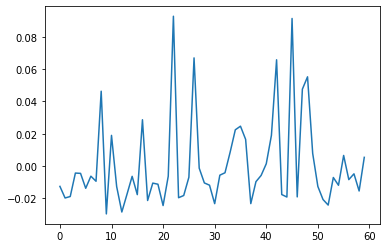

In [100]:
plt.plot(profit1)

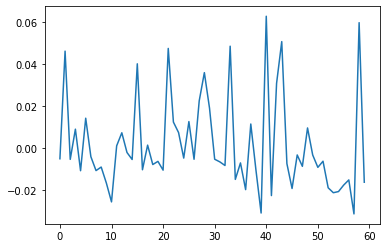

In [102]:
plt.plot(profit2)

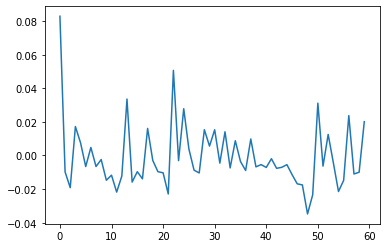

In [103]:
plt.plot(profit3)

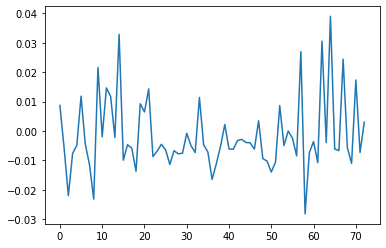

In [104]:
plt.plot(profit4)

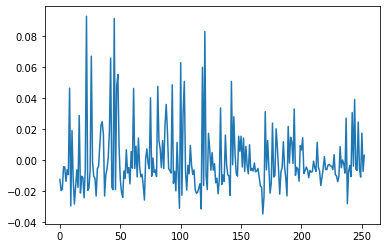

In [101]:
plt.plot(profit)

In [ ]:
'''
controlled histories:
buying: 
15.12.2020
14.09.2020
20.07.2020

selling:


'''



In [32]:
df_daily.iloc[19]

min                            5.52
max                             7.1
close                          6.09
macd                       0.150986
macds                      0.193378
macdh                     -0.042392
deneme                            0
date2     2012-01-19 00:00:00+00:00
Name: 2012-01-19 00:00:00+00:00, dtype: object

In [ ]:
# kar zararı oranlara göre görmek lazım
# dönemlere göre bölüp araştıralım. 5 yıllık 4 dilime bölebiliriz. 
# bu dilimlerin grafiklerini çizelim. 
# algoritmayı tersine çevirerek çalıştırınca kar mı geliyor? 
# en fazla üst üste kaç trade kar veya zarar etmişiz onu bulalım.
# üst üste 2, 3, 4 kere zarar etmenin ihtimalleri nedir?


# alım satım noktalarını bilgisayara bıraksaydık ve o modele göre alım satım yapsaydık ne kadar kar ederdik? 